In [2]:
import pandas as pd

In [3]:
#import the 'hospital data' and call it hp
hp = pd.ExcelFile('Financial Performance.xlsx')
hp

In [4]:
hp.sheet_names

[u'Hospitals', u'2014', u'2013', u'2012']

In [5]:
#Load the xlsx file's sheets into df1, df2, df3 & df4
df1 = hp.parse('Hospitals')
df2 = hp.parse('2012', thousands=",", index_col = 0)
df3 = hp.parse('2013', thousands=",", index_col = 0)
df4 = hp.parse('2014', thousands=",", index_col = 0)

In [6]:
df1.dtypes

Hospital name      object
Phone number       object
Street address     object
Suburb             object
Postcode            int64
State              object
Website            object
Description        object
Sector             object
Beds               object
Latitude          float64
Longitude         float64
dtype: object

In [7]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.basemap import Basemap


In [8]:
hospital_address = pd.DataFrame(df1, columns = ['Hospital name','State','Latitude','Longitude'])
hospital_nsw = hospital_address[hospital_address.State == 'NSW']
hospital_nsw.shape

(320, 4)

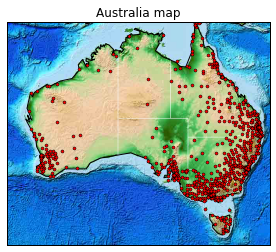

In [9]:
m = Basemap(projection='mill', llcrnrlat = -45, urcrnrlat = -10, \
        llcrnrlon = 110, urcrnrlon = 155, resolution = 'c')

m.drawcoastlines()
#m.drawcountries()
m.drawstates(color = 'white')
#m.fillcontinents()

m.drawmapboundary(fill_color='#FFFFFF')
#m.bluemarble()
#m.shadedrelief()
m.etopo()
#m.drawlsmask()

x,y = m(hospital_address['Longitude'].values, hospital_address['Latitude'].values)
m.plot(x, y, 'ro', markersize = 3)

plt.title('Australia map')
plt.show()


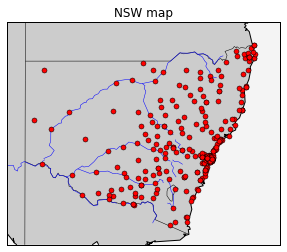

In [10]:
m = Basemap(projection='mill', llcrnrlat = -38, urcrnrlat = -27, \
        llcrnrlon = 140, urcrnrlon = 155, resolution = 'l')

m.drawcoastlines()
m.drawcountries()
m.drawstates()

m.fillcontinents()
m.drawrivers(color = 'blue')
m.drawmapboundary(fill_color = '#f4f4f4')

x,y = m(hospital_nsw['Longitude'].values, hospital_nsw['Latitude'].values)
m.plot(x, y, 'ro', markersize = 5)

plt.title('NSW map')
plt.show()

In [11]:
df2.dtypes

Peer_group                 object
State                      object
Number_of_NWAU              int64
Cost_per_NWAU               int64
No_of_unit_of_activity      int64
Comparable_cost_of_care     int64
dtype: object

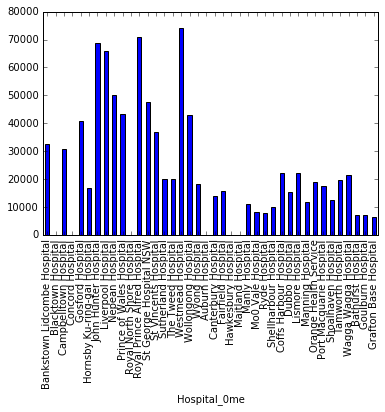

In [12]:
df2_NSW = df2[(df2.State == 'NSW')]

df2_NSW.Number_of_NWAU.plot.bar()

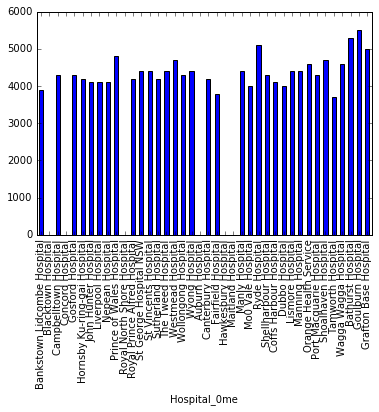

In [13]:
df2_NSW.Cost_per_NWAU.plot.bar()

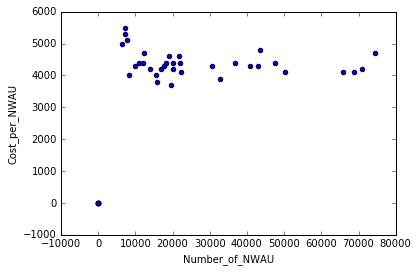

In [14]:
df2_NSW.plot.scatter(x='Number_of_NWAU', y='Cost_per_NWAU')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000011065D30>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CD38908>]], dtype=object)

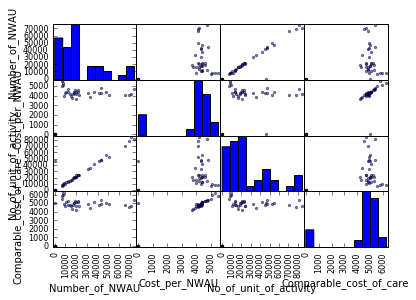

In [15]:
scatter_df2 = df2_NSW.loc[ : , ['Number_of_NWAU', 'Cost_per_NWAU','No_of_unit_of_activity','Comparable_cost_of_care']]
pd.scatter_matrix(scatter_df2)

In [16]:
df3.dtypes

Peer_group                      object
State                           object
Number_of_NWAU                   int64
Cost_per_NWAU                    int64
Percentage_private_patients    float64
dtype: object

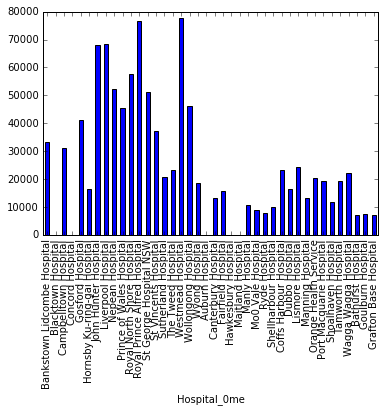

In [17]:
df3_NSW = df3[(df3.State == 'NSW')]
df3_NSW

df3_NSW.Number_of_NWAU.plot.bar()

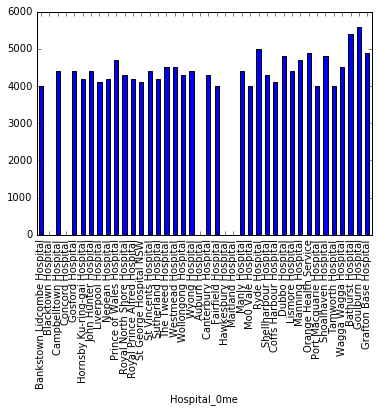

In [18]:
df3_NSW.Cost_per_NWAU.plot.bar()

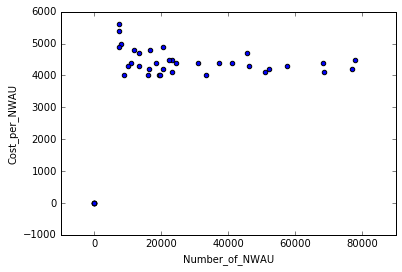

In [19]:
df3_NSW.plot.scatter(x='Number_of_NWAU', y='Cost_per_NWAU')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF77A90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000AF35BE0>]], dtype=object)

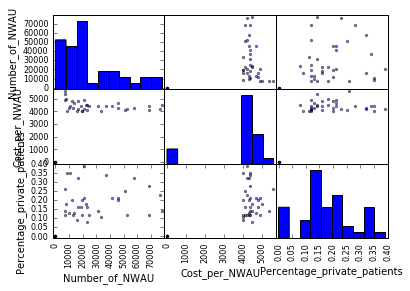

In [20]:
scatter_df3 = df3_NSW.loc[ : , ['Number_of_NWAU', 'Cost_per_NWAU','Percentage_private_patients']]
pd.scatter_matrix(scatter_df3)

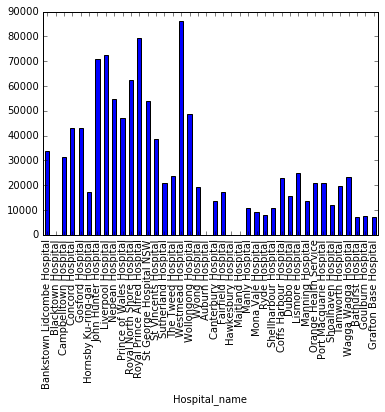

In [21]:
df4_NSW = df4[(df4.State == 'NSW')]
df4_NSW

df4_NSW.Number_of_NWAU.plot.bar()

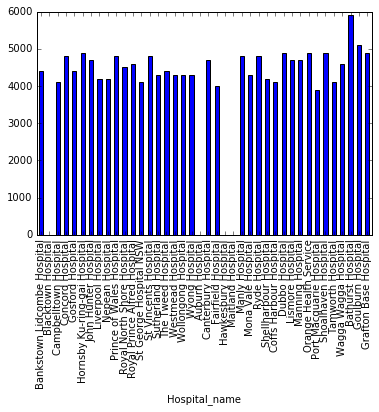

In [22]:
df4_NSW.Cost_per_NWAU.plot.bar()

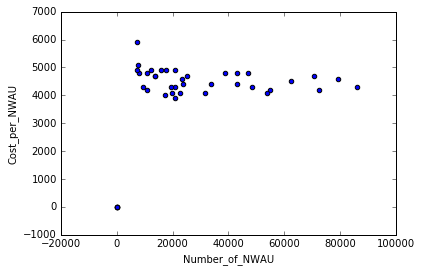

In [23]:
df4_NSW.plot.scatter(x='Number_of_NWAU', y='Cost_per_NWAU')

In [24]:
# How can I ignore certain data points?
# For example, I have a hospital with no data in it (just the hospital name)
# when I tried to create a graph, it did not let me so I had to manually put '0' in excel spreadsheet
# The graph looks ugly now...
# In addition, how can I combine dataframe with different timeframe?